## kaggle 極意本2章

In [49]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import load_digits
from torch import nn, optim

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)
print(X[0])

(1797, 64) (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [50]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [51]:
#一方通行の簡易的なモデルは nn.Sequential で作る
#複雑なモデルの場合は nn.Module を継承した class を定義する
""" class による記述

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.relu(x)
        return x
        
"""
# nn.Linear 全結合層の表現
# nn.ReLU 活性化関数ReLU
# 入力データは tensor の float

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
)

model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

0.7941012799109627


Text(0, 0.5, 'loss')

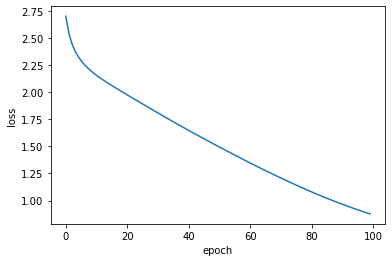

In [52]:
losses = []

for ep in range(100):
    optimizer.zero_grad()
    # yの予測値を算出
    out = model(X)

    # 損失を計算
    loss = lossfun(out, y)
    loss.backward()

    # 勾配を更新
    optimizer.step()

    losses.append(loss.item())

_, pred = torch.max(out, 1)
print((pred == y).sum().item() / len(y))

plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")